In [42]:
!pip install rasterio

In [43]:
import rasterio 
from rasterio import plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import os
import copy
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
%matplotlib inline

In [44]:
band3_1 = rasterio.open("/content/drive/MyDrive/Colab Notebooks/Images/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B3.TIF")
band5_1 = rasterio.open("/content/drive/MyDrive/Colab Notebooks/Images/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B5.TIF")

band3_2 = rasterio.open("/content/drive/MyDrive/Colab Notebooks/Images/LC08_L2SP_141045_20211023_20211103_02_T1_SR_B3.TIF")
band5_2 = rasterio.open("/content/drive/MyDrive/Colab Notebooks/Images/LC08_L2SP_141045_20211023_20211103_02_T1_SR_B5.TIF")

In [45]:
green_1 = band3_1.read(1).astype("float32")
nir_1 = band5_1.read(1).astype("float32")

green_2 = band3_2.read(1).astype("float32")
nir_2 = band5_2.read(1).astype("float32")

In [46]:
ndwi_1 = np.where(
    (green_1+nir_1) == 0.,
    0,
    (green_1-nir_1)/(green_1+nir_1)
)

ndwi_2 = np.where(
    (green_2+nir_2) == 0.,
    0,
    (green_2-nir_2)/(green_2+nir_2)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [47]:
ndwi_copy_1 = copy.copy(ndwi_1)
ndwi_copy_1[ndwi_1>0] = -100
ndwi_copy_1[ndwi_1<=0] = 0

ndwi_copy_2 = copy.copy(ndwi_2)
ndwi_copy_2[ndwi_2>0] = -100
ndwi_copy_2[ndwi_2<=0] = 0

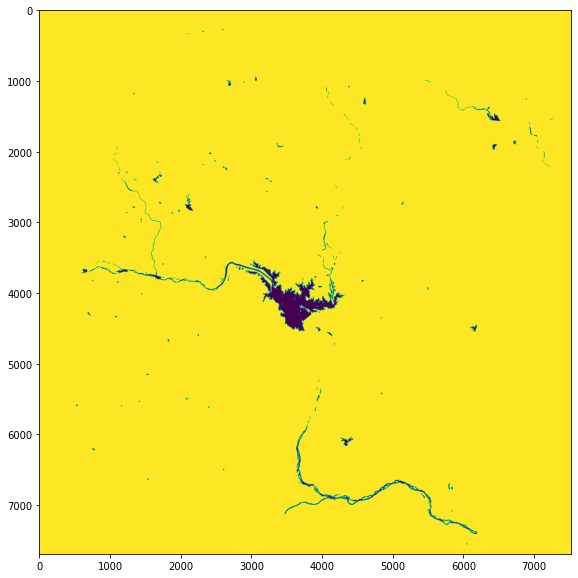

In [48]:
img = cv2.threshold(np.uint8(ndwi_copy_1), 0, 255, cv2.THRESH_BINARY)[1]

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = 100

ndwi_components_1 = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        ndwi_components_1[output == i + 1] = -100

plt.figure(figsize=(10, 10))
plt.imshow(ndwi_components_1)

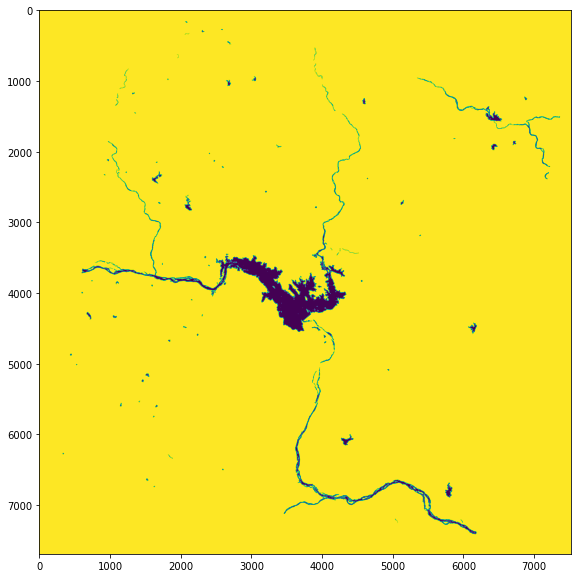

In [49]:
img = cv2.threshold(np.uint8(ndwi_copy_2), 0, 255, cv2.THRESH_BINARY)[1]

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = 100

ndwi_components_2 = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        ndwi_components_2[output == i + 1] = -100

plt.figure(figsize=(10, 10))
plt.imshow(ndwi_components_2)

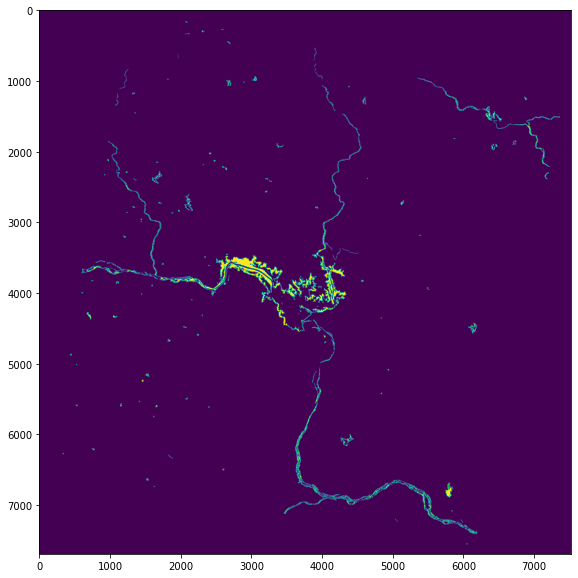

In [56]:
ndwi_components_xor_compare = np.logical_xor(ndwi_components_1, ndwi_components_2)
plt.figure(figsize=(10, 10))
plt.imshow(ndwi_components_xor_compare)

In [53]:
Area = 323
PixelCCAreaNIR_1 = (Area*(len(np.where(ndwi_components_1 == -100)[0]))/(ndwi_copy_1.shape[0]*ndwi_copy_1.shape[1]))
PixelCCAreaNIR_2 = (Area*(len(np.where(ndwi_components_2 == -100)[0]))/(ndwi_copy_2.shape[0]*ndwi_copy_2.shape[1]))
PixelCCAreaNIR_xor_compare = (Area*(len(np.where(ndwi_components_xor_compare == True)[0]))/(ndwi_components_xor_compare.shape[0]*ndwi_components_xor_compare.shape[1]))

print("Area of First Image :", PixelCCAreaNIR_1, "KM2")
print("Area of Second Image :", PixelCCAreaNIR_2, "KM2")
print("Area of Compared Image :", PixelCCAreaNIR_xor_compare, "KM2")

Area of First Image : 3.083140621074842 KM2
Area of Second Image : 5.365940062489789 KM2
Area of Compared Image : 3.2189877704020216 KM2
